# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
html = browser.html
# Create a Beautiful Soup Object
soup = soup(html, 'html.parser')
print(soup.head)

<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="" name="description"/>
<title>Mars Temperature Data</title>
<link href="css/bootstrap.min.5.2.2.css" rel="stylesheet" type="text/css"/>
<link href="css/temp.css" rel="stylesheet" type="text/css"/>
</head>


In [5]:
# Extract all rows of data
table = soup.find('table') 
rows = table.find_all('tr')

# Iterate through each row
for row in rows:
    # Extract data from each cell in the row
    cells = row.find_all('td')  
    for cell in cells:
        print(cell.text, end='\t')  
    print()  



2	2012-08-16	10	155	6	-75.0	739.0	
13	2012-08-17	11	156	6	-76.0	740.0	
24	2012-08-18	12	156	6	-76.0	741.0	
35	2012-08-19	13	157	6	-74.0	732.0	
46	2012-08-20	14	157	6	-74.0	740.0	
57	2012-08-21	15	158	6	-78.0	740.0	
68	2012-08-22	16	158	6	-77.0	740.0	
79	2012-08-23	17	159	6	-76.0	742.0	
112	2012-08-27	21	161	6	-74.0	741.0	
114	2012-08-28	22	162	6	-74.0	742.0	
123	2012-08-29	23	162	6	-75.0	741.0	
134	2012-08-30	24	163	6	-75.0	742.0	
145	2012-08-31	25	163	6	-75.0	743.0	
156	2012-09-01	26	164	6	-76.0	745.0	
163	2012-09-02	27	164	6	-75.0	743.0	
170	2012-09-03	28	165	6	-75.0	745.0	
171	2012-09-04	29	166	6	-75.0	747.0	
172	2012-09-05	30	166	6	-74.0	747.0	
173	2012-09-06	31	167	6	-74.0	745.0	
175	2012-09-08	33	168	6	-73.0	748.0	
176	2012-09-10	34	168	6	-73.0	748.0	
177	2012-09-11	35	169	6	-73.0	749.0	
178	2012-09-12	36	169	6	-73.0	750.0	
179	2012-09-13	37	170	6	-73.0	750.0	
180	2012-09-14	38	171	6	-73.0	750.0	
181	2012-09-15	39	171	6	-75.0	751.0	
182	2012-09-16	40	172	6	-75.0	753.0	
183	2012-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Extract all rows of data
table = soup.find('table') 
rows = table.find_all('tr')
columns = ['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

# Create an empty list
rows_list = []

# Loop through the scraped data to create a list of rows
for row in rows:
    cells = row.find_all('td')  
    # Create a list to store the values of each cell in the row
    row_data = [cell.text.strip() for cell in cells]
    # Append the row data to the list of rows
    rows_list.append(row_data)


print(rows_list)


[[], ['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'], ['171', '2012-09-04', '29', '166', '6', '-75.0', '747.0'], [

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(rows_list, columns=columns)



In [8]:
# Confirm DataFrame was created successfully

print(mars_df)


        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
# Convert columns to appropriate data types for analysis
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df['sol'] = mars_df['sol'].astype('Int64')  
mars_df['month'] = pd.to_numeric(mars_df['month'], errors='coerce')
mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'], errors='coerce')
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'], errors='coerce')


In [15]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          Int64
ls                          object
month                      float64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [17]:
# 1. How many months are there on Mars?
unique_months = mars_df['month'].value_counts()

# Print the result
print(unique_months)

4.0     194
3.0     192
2.0     178
1.0     174
12.0    166
5.0     149
6.0     147
7.0     142
8.0     141
11.0    138
9.0     134
10.0    112
Name: month, dtype: int64


In [19]:
# 2. How many Martian days' worth of data are there?
num_martian_days = mars_df['sol'].nunique()


print(num_martian_days)

1867


In [21]:
# 3. What is the average low temperature by month?

mars_df['min_temp'] = pd.to_numeric(mars_df['min_temp'], errors='coerce')

# Group by 'month' and calculate the average low temperature
average_low_by_month = mars_df.groupby('month')['min_temp'].mean()

# Print the result
print(average_low_by_month)


month
1.0    -77.160920
2.0    -79.932584
3.0    -83.307292
4.0    -82.747423
5.0    -79.308725
6.0    -75.299320
7.0    -72.281690
8.0    -68.382979
9.0    -69.171642
10.0   -71.982143
11.0   -71.985507
12.0   -74.451807
Name: min_temp, dtype: float64


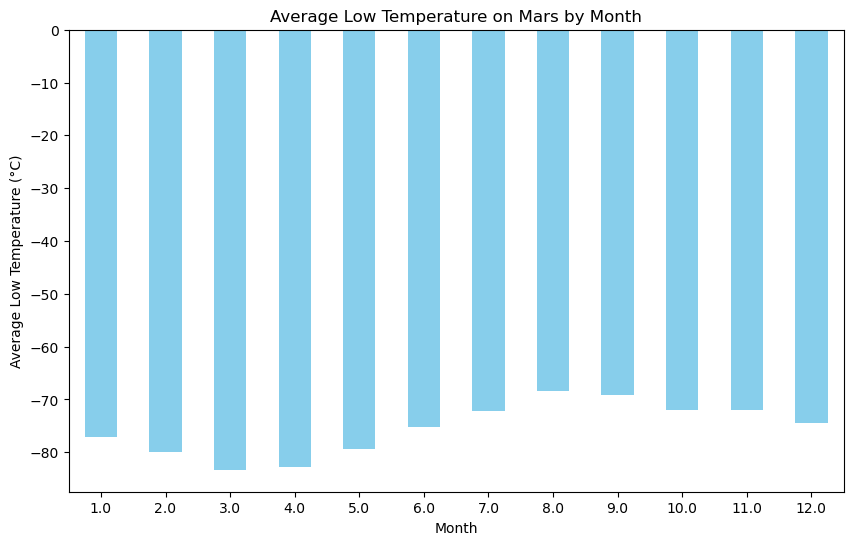

In [22]:
# Plot the average temperature by month
import matplotlib.pyplot as plt

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
average_low_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Low Temperature on Mars by Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)
plt.show()


In [24]:
# Identify the coldest and hottest months in Curiosity's location
coldest_month = mars_df.loc[mars_df['min_temp'].idxmin()]['month']
hottest_month = mars_df.loc[mars_df['min_temp'].idxmax()]['month']

print(coldest_month)
print(hottest_month)

3.0
1.0


In [25]:
# 4. Average pressure by Martian month
# Convert 'pressure' column to numeric (in case it's not already)
mars_df['pressure'] = pd.to_numeric(mars_df['pressure'], errors='coerce')

# Group by Martian month and calculate the average pressure
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Print the result
print(average_pressure_by_month)


month
1.0     862.488506
2.0     889.455056
3.0     877.322917
4.0     806.329897
5.0     748.557047
6.0     745.054422
7.0     795.105634
8.0     873.829787
9.0     913.305970
10.0    887.312500
11.0    857.014493
12.0    842.156627
Name: pressure, dtype: float64


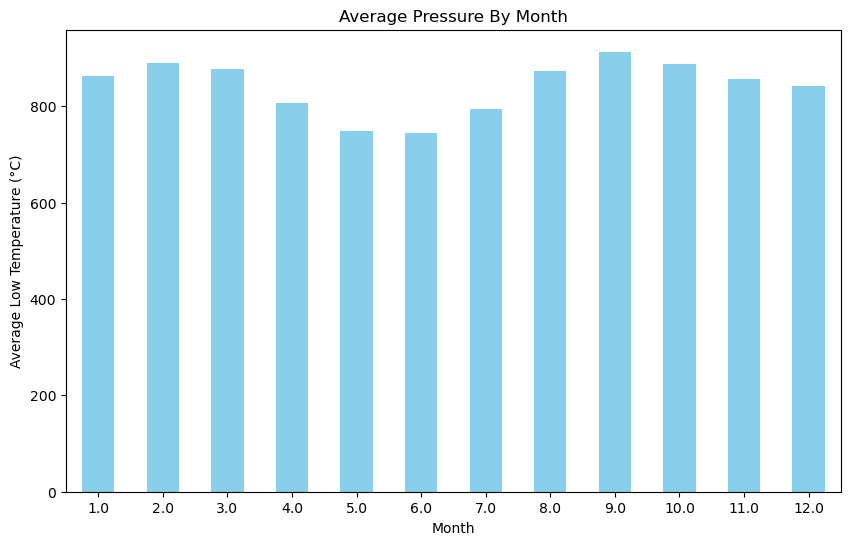

In [26]:
# Plot the average pressure by month

plt.figure(figsize=(10, 6))
average_pressure_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Pressure By Month')
plt.xlabel('Month')
plt.ylabel('Average Low Temperature (°C)')
plt.xticks(rotation=0)
plt.show()


In [ ]:
print(martian_df['month'].unique())
print(martian_df.head())

In [28]:
# 5. How many terrestrial (earth) days are there in a Martian year?


martian_year_days = 687  
earth_days_in_martian_year = mars_df['sol'].nunique() * martian_year_days

# Print the result
print(f"Number of terrestrial days in a Martian year: {earth_days_in_martian_year} days")


Number of terrestrial days in a Martian year: 1282629 days


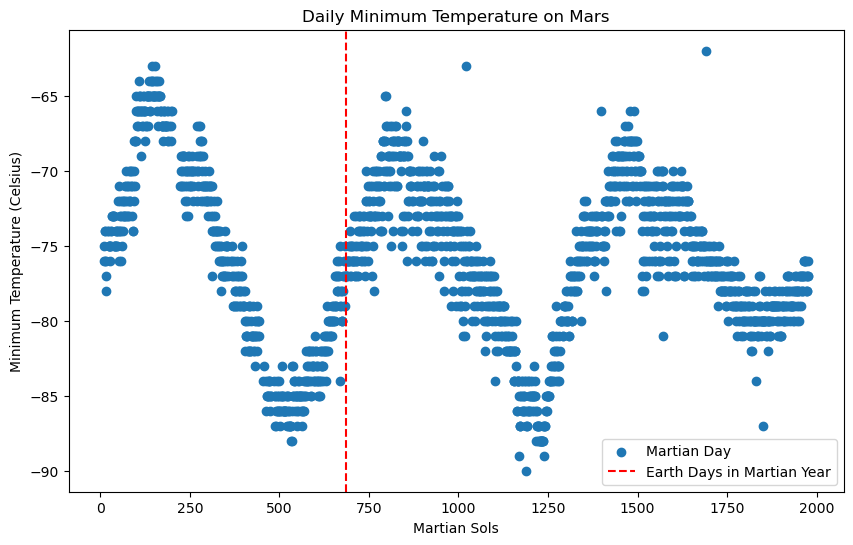

In [30]:



# Filter out rows where 'sol' is not a valid numeric value
filtered_df = mars_df[pd.to_numeric(mars_df['sol'], errors='coerce').notna()]

# Plot the daily minimum temperature against Martian sols
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['sol'], filtered_df['min_temp'], label='Martian Day')

# Assuming there are 687 Earth days in a Martian year
earth_days_in_martian_year = 687
plt.xlabel('Martian Sols')
plt.ylabel('Minimum Temperature (Celsius)')
plt.title('Daily Minimum Temperature on Mars')
plt.axvline(x=earth_days_in_martian_year, color='red', linestyle='--', label='Earth Days in Martian Year')
plt.legend()
plt.show()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:

csv_path = 'mars_data.csv'

# Write the DataFrame to a CSV file
mars_df.to_csv(csv_path, index=False)

print(f'Data has been written to {csv_path}')


Data has been written to mars_data.csv


In [34]:
browser.quit()